# Jupyter Notebook 

一个 Jupyter Notebook 文档可以同时支持多种编程语言，并将代码和结果以交互式的方式展示出来。本文展示同时使用 Stata 和 Python 的 Jupyter Notebook 文档。

## Python 代码

由于 Jupyter Notebook 对 Python 的支持一直非常好，因此在 Jupyter Notebook 中编写和运行 Python 代码非常顺畅。比如，绘制函数图 $y = x^2$ 的代码如下：


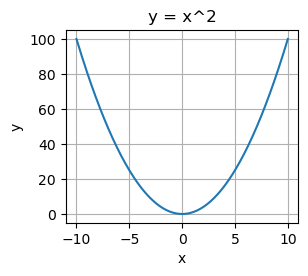

In [ ]:
# 绘制一幅简单的函数图

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200)
y = x ** 2

plt.figure(figsize=(3, 2.5))
plt.plot(x, y)
plt.title("y = x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Stata 代码

多数情况下，你能在 dofile 或 Stata 命令窗口中运行的代码，都可以在 Jupyter Notebook 中运行。以下是一个简单的 Stata 代码示例，比如：

In [2]:
dis "nbstata is so NB"

nbstata is so NB


在看一个更完整的例子：使用 Stata 自带的 `sysuse auto` 数据集，绘制汽车价格与重量的散点图，并把图形保存到当前工作路径下。


D:\temp
checking scheme_scientific consistency and verifying not already installed...
all files already exist and are up to date.
(1978 automobile data)

       price   weight   mpg  
  1.   4,099    2,930    22  
  2.   4,749    3,350    17  
  3.   3,799    2,640    22  
file scatter_price_weight.png written in PNG format


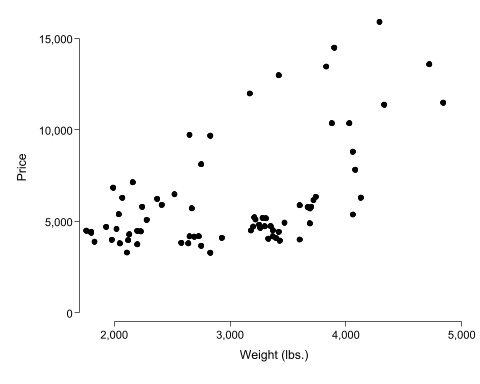

In [ ]:
cd "D:/temp"  // 设置工作目录，酌情修改或忽略此行

// 安装绘图模板
net install scheme_scientific.pkg, replace
set scheme scientific

sysuse "auto.dta", clear

list price weight mpg in 1/3, clean 

scatter price weight
graph export "scatter_price_weight.png", replace width(700)

### 魔法命令

有少数 Stata 命令是无法在 Jupyter Notebook 中直接使用的，比如 `browse`, `doedit`, `set graph_width` 等。这些命令通常都涉及到文件的读写和图形的显示，而不是简单地在结果窗中打印文字和数字结果。

不过，我们可以借助 `nbstata` 的魔法命令来实现多数功能。

`nbstata` 目前支持以下魔法指令，详情参见 [nbstata 文档](https://hugetim.github.io/nbstata/)，以及 [nbstata User Guide](https://hugetim.github.io/nbstata/user_guide.html)。

| 命令      | 描述                            |
| :-------- | :----------------------------- |
| %browse   | 查看数据集                      |
| %head     | 查看前 5 (或 N) 行            |
| %tail     | 查看最后 5 (或 N) 行          |
| %frbrowse | 查看数据框                      |
| %frhead   | 查看前 5 (或 N) 个数据框       |
| %frtail   | 查看最后 5 (或 N) 个数据框     |
| %locals   | 列出暂元和它们的值              |
| %delimit  | 打印当前分隔符                  |
| %help     | 显示 Stata 帮助                |
| %set      | 设置单个配置选项                |
| %%set     | 设置多个配置选项                |
| %status   | 显示 Stata 或配置状态           |
| %%echo    | 显示命令回显                    |
| %%noecho  | 不显示命令回显                  |
| %%quietly | 静默所有单元输出，包括图表       |

我设置的图片默认尺寸比较大，如需调整，可以使用 `nbstata` 的 [魔法命令](https://hugetim.github.io/nbstata/user_guide.html) 设置图片尺寸。

需要注意的是，魔法命令需要以 `%` 或 `%%` 开够，且只有放在代码块的第一行才会被识别为魔法命令。因此，我通常会让魔法命令独占一行：

In [ ]:
%set graph_width = 5.0in   // 将图形宽度设置为 5.0 英寸

In [ ]:
%set graph_height = 4.0in  // 将图形高度设置为 4.0 英寸

执行完上述两行命令后，再绘制的图形就会按照指定的宽度和高度显示了：

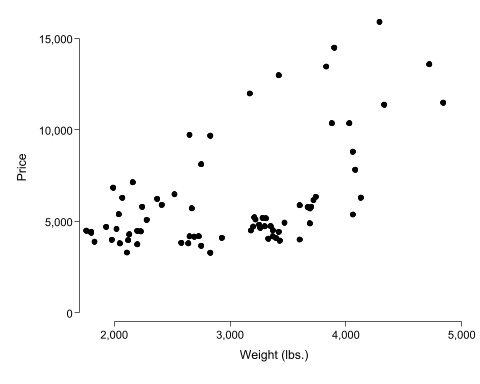

In [ ]:
scatter price weight

再看几个有趣的例子：

- `%status` 可以显示当前 Stata 的版本和配置状态。
- `%head` 可以查看数据集的前 5 行，或者指定行数。我猜是借用了 Python 中的 `head()` 函数。

In [ ]:
%status

    System information
      Python version         3.12.7
      Stata version          Stata 17.0 (MP)
      Stata library path     D:\stata17\mp-64.dll
      Stata initialized      True
      sfi initialized        True

    Settings
      graphic display        True
      graphic size           width = 5.0in, height = 4.0in
      graphic format         png

      echo                   None
      missing                .
      browse_auto_height     True
      config file path       C:\Users\Administrator\.config\nbstata\nbstata.conf


In [ ]:
%head price weight mpg make foreign

,price,weight,mpg,make,foreign
1,"4,099","2,930",22,AMC Concord,Domestic
2,"4,749","3,350",17,AMC Pacer,Domestic
3,"3,799","2,640",22,AMC Spirit,Domestic
4,"4,816","3,250",20,Buick Century,Domestic
5,"7,827","4,080",15,Buick Electra,Domestic
